#로그로스

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

np.random.seed(0)

# Generate data
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42,
                  cluster_std=5.0)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:800], y[600:800]
X_train_valid, y_train_valid = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

# Any results you write to the current directory are saved as output.

1.2798766713748249


In [2]:
import numpy as np
from sklearn.metrics import log_loss

def cross_entropy(predictions, targets):
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.97]])
targets = np.array([[1,0,0,0],
                   [0,0,0,1]])

cross_entropy(predictions, targets)
# 0.7083767843022996

log_loss(targets, predictions)
# 0.7083767843022996

log_loss(targets, predictions) == cross_entropy(predictions, targets)
# True   


True

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

모든 데이터 사용

In [ ]:
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)    # 0.9473684210526315

log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)   # 1.0

scikit-learn에서 ovr 및 ovo를 사용하여 모든 이진 분류 알고리즘을 다중 분류 알고리즘으로 변환할 수 있다.

#타이타닉 예제

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    
from sklearn.model_selection import train_test_split

# Pipeline library for Training
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

train data로부터 target값이 결측치인 값을 제거  
categorical_variable에 대해서는 unique값이 10이하인 feature만 사용

In [ ]:
X = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/titanic/train.csv")
X_test = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/titanic/test.csv")
print(X.shape, X_test.shape)


#누락 된 대상이있는 행을 제거하고 예측 변수에서 대상을 분리
X.dropna(axis=0, subset=['Survived'], inplace=True)
y = X.Survived
X.drop(['Survived'], axis=1, inplace=True)

#categorical_variable에 대해서는 unique값이 10이하인 feature만 사용
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == 'object']


numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['float64', 'int64']]


my_cols = categorical_cols + numerical_cols
X = X[my_cols].copy()
X_test = X[my_cols].copy()

(891, 12) (418, 11)


In [ ]:
X_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/train.csv")
#데이터 불러오기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


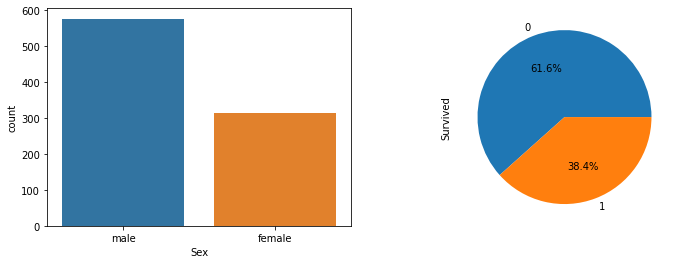

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
X_
X_['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

sns.countplot('Sex', data=X_, ax=ax[0])

Pipelines 전처리기기library

In [ ]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
        transformers =[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
# 랜덤 포레스트는 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)
])
#print(rf_clf)
print(cross_val_score(clf, X, y, cv=10).mean())

0.8216104868913856


혼동행렬  
         예측양성  예측음성  
 실제 양성   TP      FN  
 실제 음성   FP      TN  

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# train_test_split: 80%, 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2)

#print(X_val)
# modeling
rf_clf = RandomForestClassifier()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)
])

# train
clf.fit(X_train, y_train)
preds = clf.predict(X_val)


# confusion_matrix
cm = confusion_matrix(y_val, preds)
print(cm)
#sns.heatmap(cm, annot=True, fmt="d")

[[100  14]
 [ 20  45]]


정확도는 target variable이 거의 균등할때 사용하면 좋음

불균형한 데이터셋에서 정확도를 사용한다면 그 결과는 상당히 왜곡됨
정확도는 높지만 쓸모없는 모델이 만들어 지는데 이 때, Accuracy 대신 사용할 수 있는 지표가 정밀도와 재현율이다.


In [ ]:
clf.score(X_val, y_val)  #테스트 데이터 및 레이블에 대한 평균 정확도
accuracy_score(y_val, preds)
# 전체 샘플중 맞게 예측한 샘플수

0.8100558659217877

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_val, preds, pos_label=1)

0.7627118644067796

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_val, preds, pos_label=1)

0.6923076923076923

F1 score는 정밀도와 재현율을 결합한 지표이며, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.  
정확도만큼 이해하기 쉽지는 않지만 일반적으로 F1이 정확도보다 더 유용하다  
f1-score는 데이터가 imbalance할 때 측정 도구로 사용하면 좋습니다  

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_val, preds, pos_label=1))

0.7258064516129032


AUC : 아래 면적이 1에 가까울수록, 넓을 수록 좋은 모형  

In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.7847503373819164

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, preds)

0.7847503373819164

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_val, preds)

6.560496045774054

#성능평가 모두 구하기

sklearn 에서 classification_report module을 사용하여 평가 지표를 한번에 볼 수 있음

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       120
           1       0.71      0.68      0.70        59

    accuracy                           0.80       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



f1-score는 데이터가 imbalance할 때 측정 도구로 사용하면 좋음

정확도는 80%  
학습데이터에서 생존자가 38.4% 사망자가61.6%로 조금 불균형한 데이터에는 f1-score를 사용 


macro avg: 단순평균값
weighted avg: 각 클래스에 속하는 표본의 갯수로 가중평균값

단순평균값으로는 78%의 f1-score를 보이며 가중평균으로는 0.80의 f1-score

정확도와도 크게 차이가 나지않는것 보면 클래스 불균형 X

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

UC-ROC curve는 모델이 class를 얼마나 잘 구별해 줄 수 있는지

AUC가 클수록 모델은 타이타닉호의 생존자와 사망자를 더 잘 구별



면적을 측정하여 TPR FPR 복합적으로 평가가능  
thresholds : 임계값 => 의미: thresholds 의 이하의 값은 False, 이상은 True 로 판단.


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, preds, pos_label=1)
print(fpr, tpr, thresholds)

[0.         0.12280702 1.        ] [0.         0.69230769 1.        ] [2 1 0]


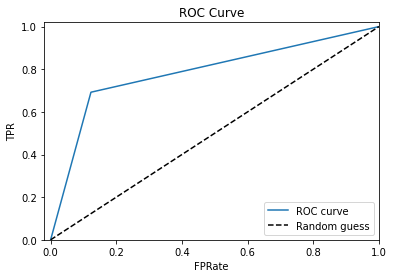

In [ ]:
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('FPRate')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")